In [1]:
import matplotlib.pyplot as plt
import numpy as np

Seed = 283947129834792
Plot 1000 sequential random numbers against each other.
Plot 1000000 random numbers in 20 bins 0.05 wide.


(array([50205., 50113., 50113., 50133., 49633., 50049., 49942., 50310.,
        50188., 50128., 50197., 49976., 49814., 49851., 49694., 50139.,
        49826., 50201., 50219., 49269.]),
 array([4.97509440e-09, 4.99999740e-02, 9.99999430e-02, 1.49999912e-01,
        1.99999881e-01, 2.49999850e-01, 2.99999819e-01, 3.49999788e-01,
        3.99999757e-01, 4.49999726e-01, 4.99999695e-01, 5.49999664e-01,
        5.99999633e-01, 6.49999602e-01, 6.99999571e-01, 7.49999540e-01,
        7.99999509e-01, 8.49999478e-01, 8.99999447e-01, 9.49999416e-01,
        9.99999385e-01]),
 <a list of 20 Patch objects>)

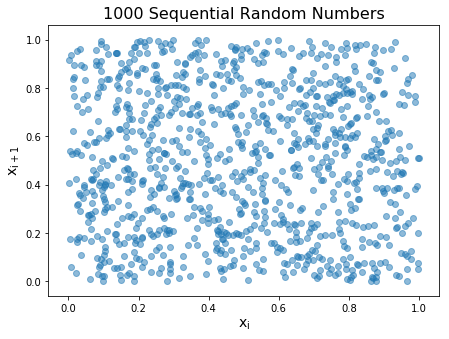

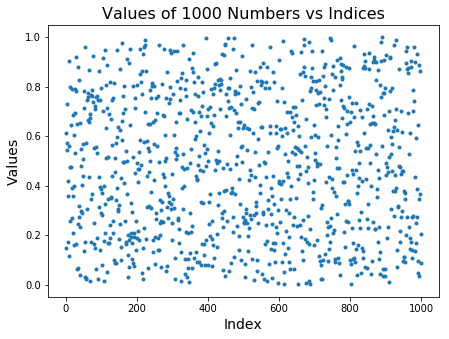

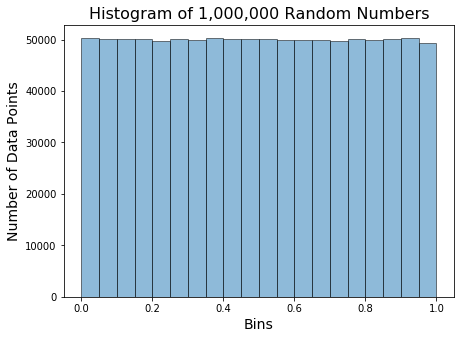

In [2]:
# Set seed. Only once during the entire run.
I0=283947129834792
print('Seed = '+str(I0))

# All three methods from lecture slides are combined by applying 
# the input as the output of the previous method.

# (Multip.) Linear Congruential Generators. 
def lcg(I=I0, m=2**64-1, a=56675949247, c=10139042236):
    
    global I0
    I0 = (a*I0 + c) % m
    return I0

# Multiply with Carry (MWC) with base b = 2**32.
# Parameters acquired from lecture slides.
def mwc(a=4294957665):
    
    # Use the output of LCG as the input of MWC. 
    n = a*(lcg() & (2**32-1))+(lcg()>>32)
    return n

# 64-bit XOR-shift.
# Parameters acquired from lecture notes. 
def xor_shift_64(a1=21, a2=35, a3=4, P=2**64-1, ):
    
    # Use the output of MWC as the input of XOR-shift.
    X = mwc()
    
    # Set to 64-bit. 
    bit64 = 0xffffffffffffffff
    
    t = X^(X<<a2) & bit64 # Keep in 64-bit.
    Y = X
    Z = Y
    W = Z
    W = W^(W>>a1)^t^(t>>a3) & bit64 # Keep in 64-bit.
    
    return W / P # Gernerate numbers between 0 and 1. 

# Create two zeros arrays and assign x_i and x_i+1 with 1000 numbers.
x_i = np.zeros(1000)
x_i_plus_1 = np.zeros(1000)
for i in range(len(x_i)):
    x_i[i] = xor_shift_64()
    x_i_plus_1[i] = xor_shift_64()
    
# Plot x_i vs x_i+1 for the first 1000 numbers generated.
print('Plot 1000 sequential random numbers against each other.')
plt.figure(figsize=(7,5))
plt.title('1000 Sequential Random Numbers', fontsize=16)
plt.xlabel('x$_{\mathrm{i}}$', fontsize=14)
plt.ylabel('x$_{\mathrm{i+1}}$', fontsize=14)
plt.scatter(x_i, x_i_plus_1, alpha=0.5)

# Plot value of the random numbers for the first 1000 numbers vs the index of the random number.
plt.figure(figsize=(7,5))
plt.title('Values of 1000 Numbers vs Indices', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.plot(x_i, '.')


# Create an zeros array and assign 1000000 numbers.
one_million = np.zeros(1000000)
for i in range(len(one_million)):
    one_million[i] = xor_shift_64()

# Put 1000000 random numbers in 20 bins with 0.05 wide and plot them. 
print('Plot 1000000 random numbers in 20 bins 0.05 wide.')
plt.figure(figsize=(7,5))
plt.title('Histogram of 1,000,000 Random Numbers', fontsize=16)
plt.xlabel('Bins', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.hist(one_million, bins=20, alpha=0.5, histtype='bar', ec='black')


(array([0.0039454 , 0.01315134, 0.05260535, 0.0973199 , 0.14992526,
        0.15452823, 0.11310151, 0.05523562, 0.01380891, 0.0039454 ]),
 array([-4.64011595, -3.11935818, -1.59860041, -0.07784263,  1.44291514,
         2.96367291,  4.48443068,  6.00518845,  7.52594623,  9.046704  ,
        10.56746177]),
 <a list of 10 Patch objects>)

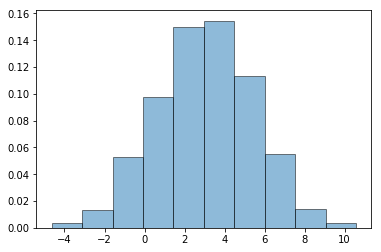

In [3]:
def box_muller(z1, z2):
    bm = np.cos(2*np.pi*z2)*np.sqrt(-2*np.log(z1))
    return bm

normal = box_muller(x_i, x_i_plus_1)

mu = 3
sigma = 2.4
gauss_map = normal*sigma+3


plt.hist(gauss_map, density=True, alpha=0.5, histtype='bar', ec='black')

In [4]:
def ks_test(z):
    for i in range(len(z)):
        if z[i]<1.18:
            p_ks = (np.sqrt(2*np.pi)/z)* \
                ((np.exp(-np.pi**2/(8*z**2)))+(np.exp(-np.pi**2/(8*z**2)))**9+(np.exp(-np.pi**2/(8*z**2)))**25)
        else:
            p_ks = 1-2*((np.exp(-2*z**2))-(np.exp(-2*z**2))**4+(np.exp(-2*z**2))**9)
    
    return p_ks

from scipy.stats import kstest

print(kstest(normal, 'norm'))

#print(ks_test(normal))


KstestResult(statistic=0.02687774740404847, pvalue=0.4632397122214178)


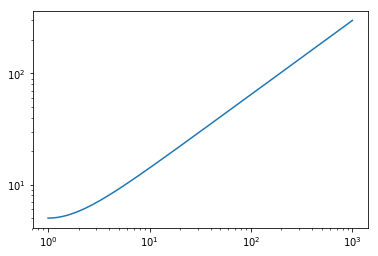

In [25]:
H0 = 7.16e-11 # [yr^-1]
omega_0 = 1

a = lambda t: ((3/2)*H0*t)**(2/3)
a_dot = lambda t: H0*((3/2)*H0*t)**(-1/3)

# y = dD/dt
def f(r, t):
    
    D = r[0]
    dD_dt = r[1]
    
    d2D_dt2 = -2*(a_dot(t)/a(t))*dD_dt + (3/2)*omega_0*(H0**2)*(D/(a(t)**3))
    
    return np.array([dD_dt, d2D_dt2])
                    
def rk4(f,r,t,h):
    
    k1 = h * f(r, t)
    k2 = h * f(r+k1/2., t+h/2.)
    k3 = h * f(r+k2/2., t+h/2.)
    k4 = h * f(r+k3, t+h)
    return k1/6. + k2/3. + k3/3. + k4/6.

def ode(init, lower, upper, N):
    h = (upper-lower)/N
    
    r = init
    t_values, D_values = [],[]
    
    for t in np.arange(lower, upper, h):
        t_values.append(t)
        D_values.append(r[0])
        r += rk4(f,r,t,h)
        
    return t_values, D_values

t_init, t_final, s = 1., 1000., 8
N = int((t_final-t_init)*s)

plt.figure()

t_values, D_values = ode([5,0], t_init, t_final, N)
plt.loglog(t_values, D_values)


x(t=2)= 4.365332495817935


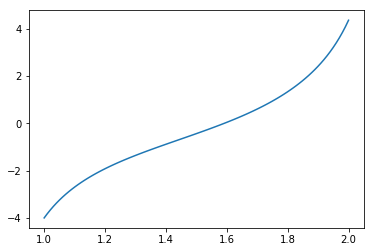

In [75]:
# Runge-Kutta 2 method, good to order O(h^3)

def f(t,x):
    return 1 + pow(x,2) + pow(t,3)

N = 100
t_values = np.linspace(1., 2., N)
h = t_values[1] - t_values[0]
x_values = np.zeros(N)
x_values[0] = -4.
for i in range(N-1):
    k1 = h * f(t_values[i], x_values[i])
    k2 = h * f(t_values[i]+h/2., x_values[i]+k1/2.)
    x_values[i+1] = x_values[i] + k2
print("x(t=2)=", x_values[-1])
plt.plot(t_values, x_values)
plt.show()